<a href="https://colab.research.google.com/github/fboldt/aulasann/blob/main/aula02c_regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [124]:
import numpy as np

def criaDatasetBidimensionalBinário(n=20, slop=[2, 1], intercept=0.4, dummy_features=3):
    X = np.random.uniform(size=(n,dummy_features+2))
    AUX = np.multiply(X[:,:2], slop)-[0, intercept]
    y = np.array(AUX[:,0]>AUX[:,1], dtype=int)*2-1
    return X, y

slop = [2, 1]
intercept = -0.4
dummy_features = 3
Xtr, ytr = criaDatasetBidimensionalBinário(n=20, slop=slop, intercept=intercept, dummy_features=dummy_features)
Xtr, ytr

(array([[0.49592276, 0.83172794, 0.90514345, 0.14507769, 0.40161663],
        [0.51411853, 0.58924349, 0.07357585, 0.33887109, 0.7413174 ],
        [0.82291692, 0.55441475, 0.07100719, 0.28452405, 0.71375543],
        [0.44947244, 0.18716652, 0.69108664, 0.52408264, 0.46403997],
        [0.57684507, 0.31258178, 0.38391784, 0.05541199, 0.65591457],
        [0.15895506, 0.96812413, 0.02081065, 0.10887614, 0.73703435],
        [0.00146042, 0.72206566, 0.28230209, 0.1853431 , 0.09089852],
        [0.65977332, 0.52555934, 0.0932599 , 0.04494614, 0.55196345],
        [0.22774087, 0.79852211, 0.30979516, 0.22322774, 0.82988247],
        [0.08997357, 0.5711692 , 0.99399065, 0.17080055, 0.68407676],
        [0.36105971, 0.41988498, 0.66421497, 0.36496594, 0.70928954],
        [0.76162299, 0.07253265, 0.92710796, 0.90599682, 0.20947166],
        [0.23586934, 0.88636928, 0.39077162, 0.66897827, 0.24822982],
        [0.36149676, 0.32515743, 0.19230487, 0.65585467, 0.20575179],
        [0.29065245,

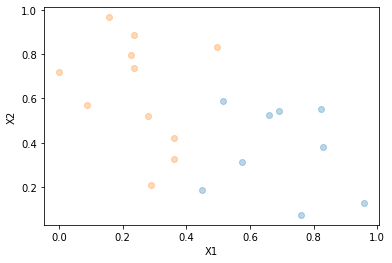

In [125]:
import matplotlib.pyplot as plt

def plotaDatasetBidimensional(X, y):
    """
    Plota um dataset bidimensional.
    """
    plt.xlabel('X1')
    plt.ylabel('X2')
    for k in set(y):
        plt.plot(X[:,0][y==k],X[:,1][y==k], "o", alpha=0.3)

plotaDatasetBidimensional(Xtr, ytr)

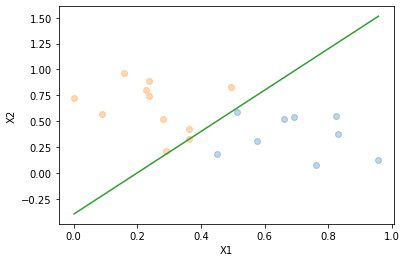

In [126]:
def plotaHiperplanoDatasetBidimensional(X, y, vetor, intercept=0):
    """
    Plota um dataset bidimensional com um hiperplano definido por um
    vetor e o valor em que este vetor intercepta o eixo vertical.
    """
    x0min = min(X[:,0])
    x0max = max(X[:,0])
    xs = np.linspace(x0min, x0max, num=2)
    ys = (-vetor[0] / vetor[1]) * xs - intercept / vetor[1]
    plt.plot(xs,ys)

plotaDatasetBidimensional(Xtr, ytr)
vetor_hyperplano = np.array(slop) * np.array([1, -1])
plotaHiperplanoDatasetBidimensional(Xtr, ytr, vetor_hyperplano, intercept)

In [127]:
def sign(a):
  return (a >= 0) * 2 - 1

In [128]:
def accuracy(yactual, ypred):
  return sum(yactual == ypred)/len(yactual)

In [129]:
from abc import ABC, abstractmethod

class TrainingAlgorithm(ABC):
  @abstractmethod
  def getW(self, X, y, activation):
    pass

class PseudoInversa(TrainingAlgorithm):
  def __init__(self, regularization=0):
    self.regularization = regularization
  def getW(self, X, y):
    return np.linalg.inv(X.T @ X + np.eye(X.shape[1])*self.regularization) @ X.T @ y

class DescidaGradiente(TrainingAlgorithm):
  def __init__(self, max_iter=100, learning_rate=0.02, regularization=0):
    self.max_iter = max_iter
    self.learning_rate = learning_rate
    self.regularization = regularization

  def getW(self, X, y):
    w = np.random.uniform(-1, 1, size=X.shape[1])
    for _ in range(self.max_iter):
      ypred = X @ w
      erros = y - ypred
      custo = sum(erros**2)
      if custo == 0:
        break
      w *= 1 - self.regularization * self.learning_rate
      w += (X.T @ erros) * self.learning_rate
    return w

0.95
[-0.25693854  1.54384016 -0.7847749  -0.27223389 -0.08110715  0.04189333]


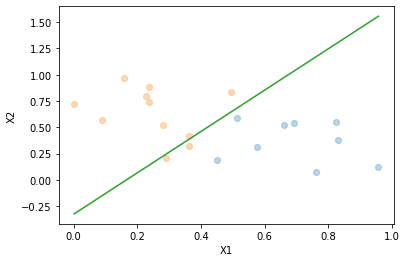

In [130]:
from sklearn.base import BaseEstimator, ClassifierMixin
import random

def include_bias(X):
  bias = np.ones((X.shape[0], 1))
  Xb = np.concatenate((bias, X), axis=1)
  return Xb

class Perceptron(BaseEstimator, ClassifierMixin):
  def __init__(self, training_algorithm=DescidaGradiente()):
     self.w = None
     self.activation = sign
     self.training_algorithm = training_algorithm

  def fit(self, X, y):
    Xb = include_bias(X)
    self.w = self.training_algorithm.getW(Xb, y)

  def __pre_activation(self, X):
    Xb = include_bias(X)
    return Xb @ self.w

  def predict(self, X):
    a = self.__pre_activation(X)
    ypred = self.activation(a)
    return ypred

perceptron = Perceptron(training_algorithm=DescidaGradiente(regularization=1))
perceptron.fit(Xtr, ytr)
print(accuracy(ytr, perceptron.predict(Xtr)))
print(perceptron.w)
plotaDatasetBidimensional(Xtr, ytr)
plotaHiperplanoDatasetBidimensional(Xtr, ytr, perceptron.w[1:], perceptron.w[0])


0.932


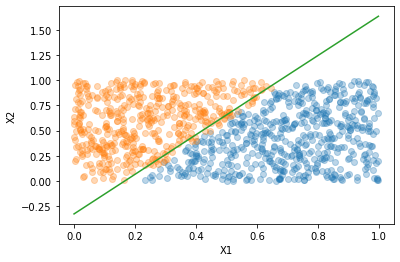

In [131]:
Xte, yte = criaDatasetBidimensionalBinário(n=1000, slop=slop, intercept=intercept, dummy_features=dummy_features)
print(accuracy(yte, perceptron.predict(Xte)))
plotaDatasetBidimensional(Xte, yte)
plotaHiperplanoDatasetBidimensional(Xte, yte, perceptron.w[1:], perceptron.w[0])

0.95
[-0.28661839  1.55357104 -0.77322979 -0.26507696 -0.06454657  0.06116141]


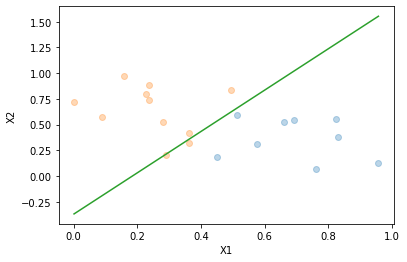

0.938


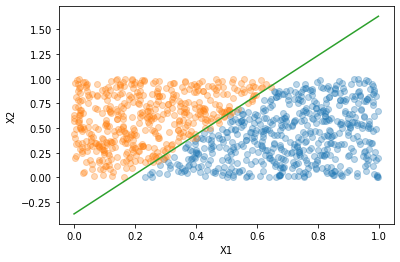

In [133]:
perceptron = Perceptron(PseudoInversa(regularization=1))
perceptron.fit(Xtr, ytr)
print(accuracy(ytr, perceptron.predict(Xtr)))
print(perceptron.w)
plotaDatasetBidimensional(Xtr, ytr)
plotaHiperplanoDatasetBidimensional(Xtr, ytr, perceptron.w[1:], perceptron.w[0])
plt.show()

print(accuracy(yte, perceptron.predict(Xte)))
plotaDatasetBidimensional(Xte, yte)
plotaHiperplanoDatasetBidimensional(Xte, yte, perceptron.w[1:], perceptron.w[0])